## Passo 1
### Fazer as importações necessárias 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Passo 2 
### Tratar os dados

- `df.info()` retorna as informações sobre o dataset
- `df.drop()` remove a colunas especifícada 

In [15]:
df = pd.read_csv('iris.csv', encoding="ISO-8859-1")

df.info()

df = df.drop('Unnamed: 0', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- `df.rename` renomeia as colunas, utilizei dicionário para falicitar minha vida kkkk
- `df.head` mostra as primeira 5 linhas da coluna

In [16]:
df = df.rename(columns={"Sepal.Length":"SepalLength",
                        "Sepal.Width": "SepalWidth",
                        "Petal.Length": "PetalLength",
                        "Petal.Width": "PetalWidth"})
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Passo 3
### Analisar os dados

- `df.shape` nos mostra a quantidade de linhas e colunas no dataset

In [17]:
df.shape

(150, 5)

- Também utilizei o `value_counts` pra verificar a distribuição de espécies 

In [18]:
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

- Da pra notar uma distancia entre espécie setosa e as demais

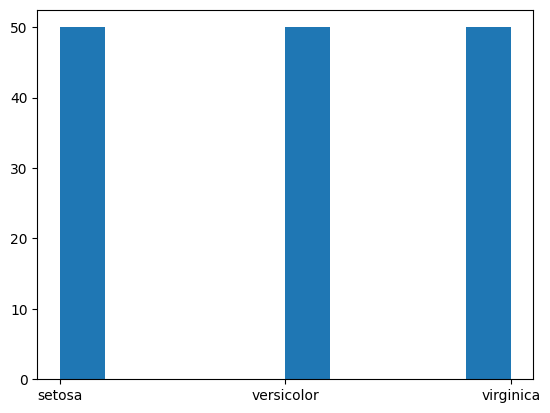

In [19]:
plt.hist(df['Species'])
plt.show()

- Analisando mais a fundo, há clamente uma semelhança entre a *virginica* e a *versicolor*

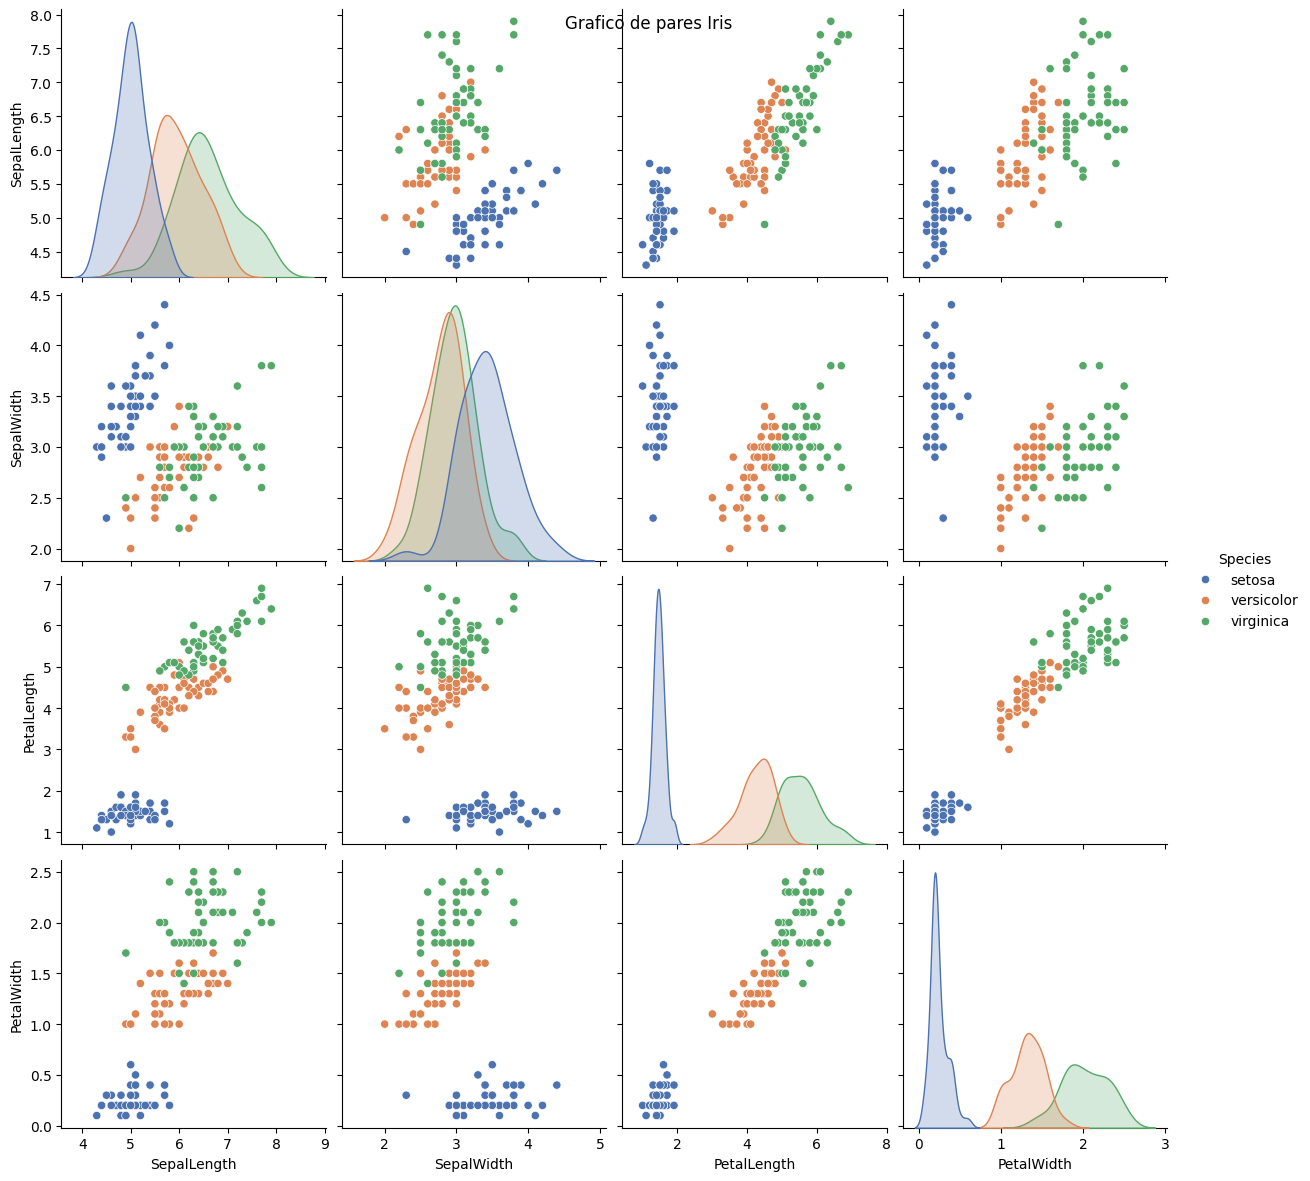

In [20]:
gp = sns.pairplot(df, hue='Species', height=3, palette='deep')
gp.fig.suptitle("Grafico de pares Iris")
plt.show()

- Notado também no nosso **boxplot**, a petala da setosa é a mais diferente das três

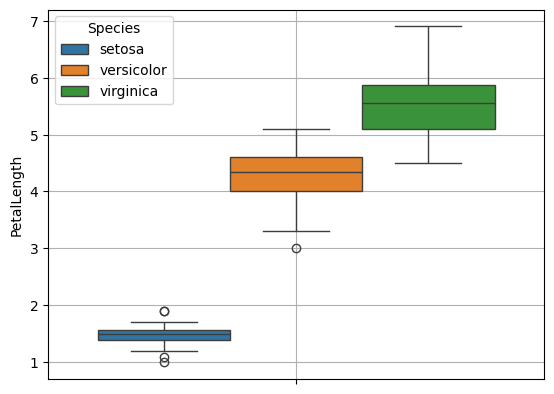

In [21]:
sns.boxplot(hue='Species', y='PetalLength', data=df)
plt.grid()
plt.show()

## Passo 4
### Criar nosso modelo

- Utilizei o modelo `RandomForestClassifier` mas não é necessariamente uma regra
- Criamos as variáveis de treino e de teste com o `train_test_split`

In [22]:
X = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = RandomForestClassifier(random_state=42)

- A função `fit` treina nosso modelo com os treinos (no nosso caso 30% do dataset)

In [23]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

- Ao analisar o score obtemos 100%, ou seja, nosso modelo está pronto

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.11%
